In [33]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from sklearn.externals import joblib
import matplotlib.pyplot as plt
import numpy as np
import cv2
import sys
from skimage.filters import gaussian

sys.path.append(r"D:\Projects\LEGO Vision\Helpers")

In [16]:
import helpers

In [2]:
detector = joblib.load(r"D:\Projects\LEGO Vision\Localization\SVM\SVMDetector.joblib")

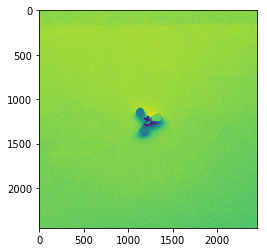

In [37]:
image = cv2.imread(r"C:\Users\Thijs\Google Drive\LEGO Vision\IMG_20181023_162229-cropped.jpg", 0)
plt.imshow(image)

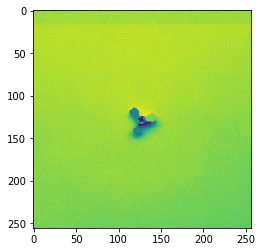

In [38]:
image = cv2.resize(image, (256, 256))
plt.imshow(image)

In [27]:
descriptor = np.squeeze(helpers.hog_descriptor_opencv(image, shape=(256, 256)))
detector.predict([descriptor])

array([0])

In [28]:
detector_skimage = joblib.load(r"D:\Projects\LEGO Vision\Localization\SVM\SVMDetector-SkimageHog.joblib")

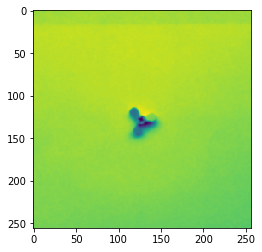

In [39]:
image = gaussian(image, sigma=0.9)
plt.imshow(image)

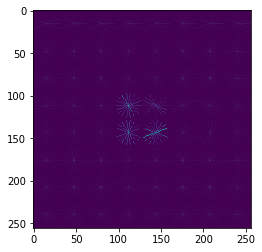

In [40]:
descriptor, image = helpers.hog(image, pixels_per_cell=(32, 32),
                                cells_per_block=(8, 8), orientations=9, block_norm='L2-Hys', visualize=True)
plt.imshow(image)

In [31]:
detector_skimage.predict([descriptor])

array([0])

In [41]:
img_filt = cv2.medianBlur(cv2.imread(r"C:\Users\Thijs\Google Drive\LEGO Vision\IMG_20181031_112940.jpg",0), 5)
img_th = cv2.adaptiveThreshold(img_filt,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
contours, hierarchy = cv2.findContours(img_th, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

ValueError: too many values to unpack (expected 2)